# Part I-A

### Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\Maheshwar\\Desktop\\IIT-B\\GDP -Assignment\\GDP Assignment Files\\State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv")
#original count of rows and columns before start of analysis
print(df.shape)

#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
df = df.drop(df[(df.Duration == "2016-17")].index)
##to check if the row has been dropped successfully
print(df.shape)

#drop west bengal as it has all nan values
df = df.dropna(axis=1, how='all')
#to check if the column has been dropped successfully
print(df.shape)

(11, 36)
(9, 36)
(9, 35)


Further in the Analysis NA values has been ignored and not imputed, as imputing NA values may mislead analysis

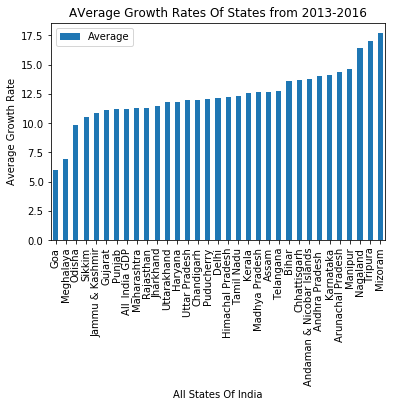

In [159]:
#Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'
df_gopy = df.iloc[6:11, 2:].mean(axis=0)
df_gopy_sw = df_gopy.reset_index().set_axis(['States','Average'], axis=1, inplace=False).sort_values('Average',ascending=True)


#Plots 
df_gopy_sw.plot(x='States', y='Average', kind='bar') 
plt.ylabel('Average Growth Rate')
plt.xlabel('All States Of India')
plt.title('AVerage Growth Rates Of States from 2013-2016')
plt.show()

### Which states have been growing consistently fast, and which ones have been struggling?

From the graph it is clear that the **Average Growth Rate** of  **Goa** and **Meghalaya** has slow growth rates with values of **6.03** and **6.95** while **Nagaland**,**Tripura** and **MIzoram** has highest growth rates with values being **16.42**,**17** and **17.7** <br>
To conclude <br>
1.States like **Nagaland**,**Tripura** and **MIzoram** has been _growing consistently fast_ <br>
2.States like **Goa** and **Meghalaya** has been struggling in terms of their *Average Growth Rate* over the years **2013-14, 2014-15 and 2015-16**

## **Curiosity Exercise** <br>
### What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

In [160]:
array = ['Karnataka', 'All_India GDP']
df_gopy_ce = df_gopy_sw.loc[df_gopy_sw['States'].isin(array)]
print(round(df_gopy_ce,2))
print(df_gopy_ce[df_gopy_ce['States']=="Karnataka"]['Average'].values/df_gopy_ce[df_gopy_ce['States']=="All_India GDP"]['Average'].values)

           States  Average
32  All_India GDP    11.20
11      Karnataka    14.12
[1.26033918]


My Home State is **_Karnataka_** and it's *Average Growth Rate* over the years 2013-14, 2014-15 and 2015-16 is **14.12** <br>
**_Karnataka_** is also the among the second top contributors along with **Arunachal Pradesh** contributing around **1.26%**
for the total **_National Average_**

### Plot the total GDP of the states for the year 2015-16:

In [161]:
#Extract the columns i.e States and GSDP - CURRENT PRICES (` in Crore) for the year 2015-16
df_gdp = df.iloc[4:5,:-1].T
df_gdp = df_gdp.reset_index()
print(df_gdp)

                        index                                   4
0          Items  Description  GSDP - CURRENT PRICES (` in Crore)
1                    Duration                             2015-16
2             Andhra Pradesh                               609934
3           Arunachal Pradesh                               18784
4                       Assam                              224234
5                       Bihar                              413503
6                Chhattisgarh                              260776
7                         Goa                               45002
8                     Gujarat                              994316
9                     Haryana                              485184
10           Himachal Pradesh                                 NaN
11            Jammu & Kashmir                              118387
12                  Jharkhand                              241955
13                  Karnataka                         1.02707e+06
14        

In [162]:
#after transpose "Item Description n Duration" appears in rows so to eliminate that
df_gdp1 = df_gdp.drop(df.index[0:2])
#rename the column index as per the requirement
df_gdp1.rename(columns={'index' : 'States',4:'Total GDP'},inplace=True)
#Sort columns 
df_gdp1=df_gdp1.sort_values('Total GDP',ascending=True)

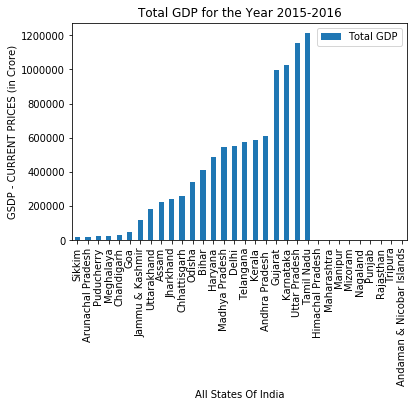

In [163]:
#Plots 
df_gdp1.plot(x='States', y='Total GDP', kind='bar') 
plt.ylabel('GSDP - CURRENT PRICES (in Crore)') 
plt.xlabel('All States Of India')
plt.title('Total GDP for the Year 2015-2016')
plt.show()

### Identify the top 5 and the bottom 5 states based on total GDP

The _**top 5**_ _States_ having highest __GDP__ for the year 2015-16 are : <br>
1. *Tamil Nadu*
2. *Uttar Pradesh*
3. *Karnataka*
4. *Gujarat*
5. *Andra Pradesh*


_**Bottom 5**_ __States__ having lowest __GDP__ for the year 2015-16 are: <br>
1. *Sikkim*
2. *Arunachal Pradesh*
3. *Puducherry*
4. *Meghalaya*
5. *Chandigarh*



In the plot the remaining _States_ values are missing in the datasheet and has been filled with *NA* values.<br>
As already said **Imputing NA Values** might mislead the data and so no changes has been made.
The States with NA values are :
1. *Himachal Pradesh*
2. *Maharashtra*
3. *Manipur*
4. *Mizoram*
5. *Nagaland*
6. *Punjab*
7. *Rajasthan*
8. *Tripura*
9. *Andaman & Nicobar Islands*

# Part I-B

## Plot the GDP per capita for all the states

### Firstly there are two important tasks to be covered <br>
### 1. Extract every State file into a single dataframe
### 2. Extract the state name from the filename

In [164]:
import pandas as pd
import glob,os

#path where all the files are stored
path = r'C:\Users\Maheshwar\Desktop\IIT-B\GDP -Assignment\GDP Assignment Files\Indian States' # use your path
#reading all paths
all_files = glob.glob(path + "/*.csv")

#empty list to add all dataframes
li = []

#loop to read each file with the path specified
for filename in all_files:
    
    #reading each file as pandas dataframe
    df = pd.read_csv(filename, index_col=None, header=0,encoding = 'Unicode_escape')
    #selecting only required columns
    df = df[['Item','2014-15']]
    #print(df.head(5))
    #Tranpose of data
    df = df.T
    #print(df.head(5))
    #Taking the header row
    new_header = df.iloc[0]
    #ignore the header row and consider the rest data
    df = df[1:]
    #Assign the new header
    df.columns = new_header
    #add the state name from the filename
    df['State'] = filename.split('\\')[-1].split('-')[1]
    #print(df['State'])
    #append the final df to the list
    li.append(df)

#Create a new df by appending all df's in the list 
frame = pd.concat(li, axis=0, ignore_index = True)

c:\users\maheshwar\miniconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



### Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.

There are 3 UT's in the file downloaded and are 
1. Delhi
2. Chandigarh
3. Puducherry

In [165]:
# drop rows basedon the index values
frame = frame.drop(frame.index[[4, 6, 21]])

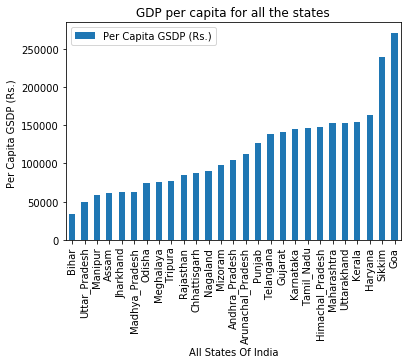

In [166]:
#Sort Per Capita GSDP in ascending order
frame_percap = frame.sort_values('Per Capita GSDP (Rs.)',ascending=True)
#Plots 
frame_percap.plot(x='State', y='Per Capita GSDP (Rs.)', kind='bar') 
plt.title('GDP per capita for all the states')
plt.ylabel('Per Capita GSDP (Rs.) ')
plt.xlabel('All States Of India')
plt.show()

### Identify the top 5 and the bottom 5 states based on the GDP per capita

The top 5 states based on *GDP per capita* are <br>
1. *Goa*
2. *Sikkim*
3. *Haryana*
4. *Kerala*
5. *Uttarakhand*

The bottom 5 states based on *GDP per capita* are <br>
1. *Bihar*
2. *Uttar Pradesh*
3. *Manipur*
4. *Assam*
5. *Jharkhand*


### Find the ratio of the highest per capita GDP to the lowest per capita GDP

In [167]:
frame_ratio = (frame['Per Capita GSDP (Rs.)'].max() / (frame['Per Capita GSDP (Rs.)'].min()))
print(round(frame_ratio,2))

8.0


The ratio between highest *Per Capita GSDP in RS* to the lowest *Per Capita GSDP in RS* is around **8** percent

### Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states

#### First of all 
1. Sort the Per Capita GSDP (Rs.) in ascending order
2. Calculate the Primary , Secondary and tertiary percentage of contributions by each state 
3. Then plot the Stacked graph of States v/s % Contribution by individual Sectors

In [168]:
frame1 = frame.sort_values('Per Capita GSDP (Rs.)',ascending=True)
frame1['Primary_percent'] = frame1['Primary']/frame1['Gross State Domestic Product']
frame1['Secondary_percent'] =  frame1['Secondary']/frame1['Gross State Domestic Product']
frame1['Tertiary_percent'] =  frame1['Tertiary']/frame1['Gross State Domestic Product']
print(frame1[['Primary_percent','State']])
print(frame1[['Secondary_percent','State']])
print(frame1[['Tertiary_percent','State']])

   Primary_percent              State
3         0.214484              Bihar
29        0.249185      Uttar_Pradesh
16        0.212351            Manipur
2         0.268892              Assam
11         0.24174          Jharkhand
14        0.370429     Madhya_Pradesh
20        0.279817             Odisha
17        0.184795          Meghalaya
27        0.317601            Tripura
23        0.312217          Rajasthan
5         0.272396       Chhattisgarh
19         0.33462           Nagaland
18        0.195165            Mizoram
0         0.309681     Andhra_Pradesh
1         0.427749  Arunachal_Pradesh
22        0.252603             Punjab
26        0.178673          Telangana
8         0.177505            Gujarat
12        0.130901          Karnataka
25        0.122005         Tamil_Nadu
10        0.148355   Himachal_Pradesh
15        0.121411        Maharashtra
28        0.113959        Uttarakhand
13        0.123373             Kerala
9         0.183797            Haryana
24        0.

Text(0, 0.5, 'States')

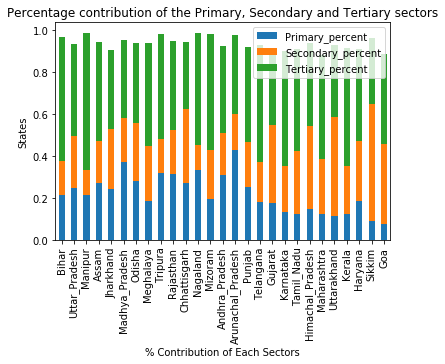

In [169]:
x= frame1[['State','Primary_percent','Secondary_percent','Tertiary_percent']]
y= x.set_index('State')

y.plot.bar(stacked=True)
plt.xlabel("% Contribution of Each Sectors")
plt.title("Percentage contribution of the Primary, Secondary and Tertiary sectors")
plt.ylabel("States")

From the graph it is clear that in States like
1. *Bihar*
2. *Manipur*
3. *Tripura*
4. *Mizoram*
5. *Telangana*
has **highest** % contribution of **Tertiary Sectors** over the **total GDP** 

States like
1. *Sikkim*
2. *Uttarkhand*
3. *Himachal Pradesh*
4. *Gujarat*
has **highest** % contribution of **Secondary Sectors** over the **total GDP**

States like
1. *Arunachal Pradesh*
2. *Madhya Pradesh*
3. *Rajasthan*
4. *Chattisgarh*
has **highest** % contribution of **Primary Sectors** over the **total GDP**

### Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on

Can be done with foolowing steps:
1. Quantile-based discretization function should be applied for Per Capita GSDP column, which assigns categories manually.
2. Extarct the sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary etc.
3. Groupby Category and obtain the  cumulative sum

In [170]:
frame1["Category"] = pd.qcut(frame1["Per Capita GSDP (Rs.)"], q=[0,.2,.5,.85,1], labels=['C4','C3','C2','C1'])
frame1[["Category",'State']]

,Category,State
3,C4,Bihar
29,C4,Uttar_Pradesh
16,C4,Manipur
2,C4,Assam
11,C4,Jharkhand
14,C4,Madhya_Pradesh
20,C3,Odisha
17,C3,Meghalaya
27,C3,Tripura
23,C3,Rajasthan


In [171]:
frame_1=frame1.loc[:,['Category','Public administration','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Gross State Domestic Product','Other services']]

In [172]:
df1= frame_1.groupby('Category').sum()
df1

,Public administration,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Gross State Domestic Product,Other services
Category,,,,,,,,,,,,
C4,13486630.0,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,233252066.0,15859015.0
C3,7927173.0,42226888.0,10835771.0,22038331.0,4604774.0,15707921.0,17245309.0,12231484.0,5766226.0,16224118.0,177966387.0,12815417.0
C2,18567815.0,75209022.0,10373346.0,109196530.0,13823378.0,40653562.0,61238862.0,33749808.0,36296642.0,92121446.0,586380452.0,36253657.0
C1,3571292.0,14391809.0,588961.0,13758793.0,2000998.0,11264451.0,13995159.0,6818560.0,3936489.0,14740245.0,101930677.0,8059922.0


## For each category (C1, C2, C3, C4):
  ### Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

Achieved through following steps
1. Find % contribution of each sub sector
2. Sort the values based on Category
3. Find the cumulative Sum
4. In each category select the Sectors that contribute to approximately 80% of the GSDP

In [173]:
df1['Agriculture, forestry and fishing %'] = df1['Agriculture, forestry and fishing'] / df1['Gross State Domestic Product'] * 100
df1['Mining and quarrying %'] = df1['Mining and quarrying'] / df1['Gross State Domestic Product'] * 100
df1['Manufacturing %'] = df1['Manufacturing'] / df1['Gross State Domestic Product'] * 100
df1['Electricity, gas, water supply & other utility services %'] = df1['Electricity, gas, water supply & other utility services'] / df1['Gross State Domestic Product'] * 100
df1['Construction %'] = df1['Construction'] / df1['Gross State Domestic Product'] * 100
df1['Trade, repair, hotels and restaurants %'] = df1['Trade, repair, hotels and restaurants'] / df1['Gross State Domestic Product'] * 100
df1['Transport, storage, communication & services related to broadcasting %'] = df1['Transport, storage, communication & services related to broadcasting'] / df1['Gross State Domestic Product'] * 100
df1['Financial services %'] = df1['Financial services'] / df1['Gross State Domestic Product'] * 100
df1['Real estate, ownership of dwelling & professional services %'] = df1['Real estate, ownership of dwelling & professional services'] / df1['Gross State Domestic Product'] * 100
df1['Public administration %'] = df1['Public administration'] / df1['Gross State Domestic Product'] * 100
df1['Other services %'] = df1['Other services'] / df1['Gross State Domestic Product'] * 100

In [174]:
df1

,Public administration,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Mining and quarrying %,Manufacturing %,"Electricity, gas, water supply & other utility services %",Construction %,"Trade, repair, hotels and restaurants %","Transport, storage, communication & services related to broadcasting %",Financial services %,"Real estate, ownership of dwelling & professional services %",Public administration %,Other services %
Category,,,,,,,,,,,,,,,,,,,,,
C4,13486630.0,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,...,2.613661,10.712459,1.847900,9.764521,11.783216,6.941761,3.294504,10.365410,5.781998,6.799089
C3,7927173.0,42226888.0,10835771.0,22038331.0,4604774.0,15707921.0,17245309.0,12231484.0,5766226.0,16224118.0,...,6.088662,12.383423,2.587440,8.826341,9.690206,6.872918,3.240065,9.116395,4.454309,7.201032
C2,18567815.0,75209022.0,10373346.0,109196530.0,13823378.0,40653562.0,61238862.0,33749808.0,36296642.0,92121446.0,...,1.769047,18.622130,2.357408,6.932967,10.443537,5.755616,6.189947,15.710184,3.166513,6.182617
C1,3571292.0,14391809.0,588961.0,13758793.0,2000998.0,11264451.0,13995159.0,6818560.0,3936489.0,14740245.0,...,0.577805,13.498187,1.963097,11.051090,13.730076,6.689409,3.861928,14.461049,3.503648,7.907258


In [175]:
#Sorting the values

df2 =  df1.loc[:,['Agriculture, forestry and fishing %', 'Mining and quarrying %', 'Manufacturing %', 'Electricity, gas, water supply & other utility services %', 'Construction %', 'Trade, repair, hotels and restaurants %', 'Transport, storage, communication & services related to broadcasting %', 'Financial services %', 'Real estate, ownership of dwelling & professional services %', 'Public administration %', 'Other services %']]
df2 = df2.sort_values('Category')
df2

,"Agriculture, forestry and fishing %",Mining and quarrying %,Manufacturing %,"Electricity, gas, water supply & other utility services %",Construction %,"Trade, repair, hotels and restaurants %","Transport, storage, communication & services related to broadcasting %",Financial services %,"Real estate, ownership of dwelling & professional services %",Public administration %,Other services %
Category,,,,,,,,,,,
C4,24.323490,2.613661,10.712459,1.847900,9.764521,11.783216,6.941761,3.294504,10.365410,5.781998,6.799089
C3,23.727451,6.088662,12.383423,2.587440,8.826341,9.690206,6.872918,3.240065,9.116395,4.454309,7.201032
C2,12.825977,1.769047,18.622130,2.357408,6.932967,10.443537,5.755616,6.189947,15.710184,3.166513,6.182617
C1,14.119213,0.577805,13.498187,1.963097,11.051090,13.730076,6.689409,3.861928,14.461049,3.503648,7.907258


#### Below are the codes to find cumulative sum for each category and also sectors that contribute to approximately 80% of the GSDP of each category

In [176]:
#cumulative sum
C1 = df2.loc['C1']
C1_sort = C1.sort_values(axis=0, ascending=False)
C1_sort
C1_Cumsum = C1_sort.cumsum()
C1_Cumsum
#contribute to approximately 80% of the GSDP of each category.
#Top7C1
Top7C1 = C1_Cumsum[:7]
Top7C1

Real estate, ownership of dwelling & professional services %              14.461049
Agriculture, forestry and fishing %                                       28.580261
Trade, repair, hotels and restaurants %                                   42.310337
Manufacturing %                                                           55.808524
Construction %                                                            66.859614
Other services %                                                          74.766872
Transport, storage, communication & services related to broadcasting %    81.456281
Name: C1, dtype: float64

In [177]:
C2 = df2.loc['C2']
C2_sort = C2.sort_values(axis=0, ascending=False)
C2_sort
C2_Cumsum = C2_sort.cumsum()
C2_Cumsum
##Top7C2
Top7C2 = C2_Cumsum[:8]
Top7C2

Manufacturing %                                                           18.622130
Real estate, ownership of dwelling & professional services %              34.332314
Agriculture, forestry and fishing %                                       47.158291
Trade, repair, hotels and restaurants %                                   57.601828
Construction %                                                            64.534795
Financial services %                                                      70.724742
Other services %                                                          76.907359
Transport, storage, communication & services related to broadcasting %    82.662975
Name: C2, dtype: float64

In [178]:
C3 = df2.loc['C3']
C3_sort = C3.sort_values(axis=0, ascending=False)
C3_sort
C3_Cumsum = C3_sort.cumsum()
C3_Cumsum
#Top7C3
Top7C3 = C3_Cumsum[:8]
Top7C3

Agriculture, forestry and fishing %                                       23.727451
Manufacturing %                                                           36.110875
Trade, repair, hotels and restaurants %                                   45.801080
Real estate, ownership of dwelling & professional services %              54.917475
Construction %                                                            63.743816
Other services %                                                          70.944849
Transport, storage, communication & services related to broadcasting %    77.817767
Mining and quarrying %                                                    83.906428
Name: C3, dtype: float64

In [179]:
C4 = df2.loc['C4']
C4_sort = C4.sort_values(axis=0, ascending=False)
C4_sort
C4_Cumsum = C4_sort.cumsum()
C4_Cumsum
#Top7C4
Top7C4 = C4_Cumsum[:7]
Top7C4

Agriculture, forestry and fishing %                                       24.323490
Trade, repair, hotels and restaurants %                                   36.106707
Manufacturing %                                                           46.819166
Real estate, ownership of dwelling & professional services %              57.184576
Construction %                                                            66.949097
Transport, storage, communication & services related to broadcasting %    73.890858
Other services %                                                          80.689947
Name: C4, dtype: float64

### Plot the contribution of the sub-sectors as a percentage of the GSDP of each category

                                                           C1         C2  \
Real estate, ownership of dwelling & profession...  14.461049  34.332314   
Agriculture, forestry and fishing %                 28.580261  47.158291   
Trade, repair, hotels and restaurants %             42.310337  57.601828   
Manufacturing %                                     55.808524  18.622130   
Construction %                                      66.859614  64.534795   
Other services %                                    74.766872  76.907359   
Transport, storage, communication & services re...  81.456281  82.662975   
Financial services %                                      NaN  70.724742   
Mining and quarrying %                                    NaN        NaN   

                                                           C3         C4  
Real estate, ownership of dwelling & profession...  54.917475  57.184576  
Agriculture, forestry and fishing %                 23.727451  24.323490  
Trade, repair,

<Figure size 1560x600 with 0 Axes>

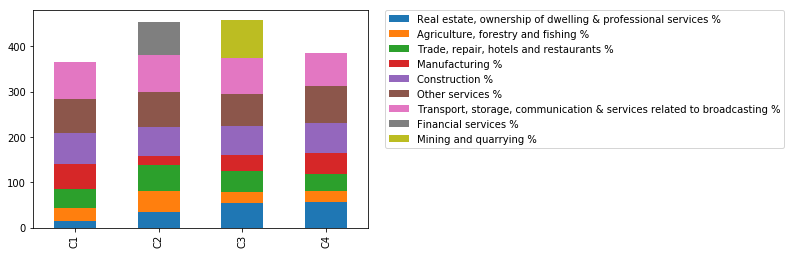

In [180]:
final_df=pd.concat([Top7C1,Top7C2,Top7C3,Top7C4],axis=1,sort=False)
print(final_df)

#Plot the contribution of the sub-sectors as a percentage of the GSDP of each category

plt.figure(num=None,figsize=(26,10),dpi=60,facecolor='w')
ax=final_df.T.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From the graph it is clear that 
**For C4**
1. Other services top the % contribution by contributing around 80% of the GSDP
2. Transport, storage, communication & services contribute to around 74% of the GSDP standing second in the row.
3. Agriculture, forestry and fishing  has least contribution of around 24% of the GSDP

So for category C4 states care should be taken on Other services and Transport, storage, communication & services as they are highest revenue generator so that they dont decrease and continue to contribute same while improvements should be made regarding Agriculture, forestry and fishing which has least % contribution.


**For C3**
1. Transport, storage, communication & services contribute to around 78% of the GSDP standing first in the row.
2. Other services  contribute to around 71% of the GSDP
3. Agriculture, forestry and fishing  has least contribution of around 24% of the GSDP

So for category C3 care should be taken on Other services and Transport, storage, communication & services as they are highest revenue generator so that they dont decrease and continue to contribute same while improvements should be made regarding Agriculture, forestry and fishing which has least % contribution.


**For C2**
1. Transport, storage, communication & services contribute to around 81% of the GSDP standing first in the row.
2. Other services  contribute to around 74% of the GSDP
3. Manufacturing contribute to around 19% of the GSDP which is the least.

So for category C2 care should be taken on Other services and Transport, storage, communication & services as they are highest revenue generator so that they dont decrease and continue to contribute same while improvements should be made Manufacturing which has least % contribution.


**For C1**
1. Transport, storage, communication & services contribute to around 81% of the GSDP standing first in the row.
2. Other services  contribute to around 75% of the GSDP
3. Manufacturing contribute to around 18% of the GSDP which is the least.

So for category C1 care should be taken on Other services and Transport, storage, communication & services as they are highest revenue generator so that they dont decrease and continue to contribute same while improvements should be made Manufacturing which has least % contribution.


### How does the GDP distribution of the top states (C1) differ from the others?

C1 States are:
1.	Kerala
2.	Haryana
3.	Sikkim
4.	Goa

The Primary, Secondary and Tertiary Sector Distribution<br>
In Kerala:<br>
The Tertiary sectors like Trade, repair, hotels and restaurants, Transport, storage, communication & services related to broadcasting, Financial services, Real estate, ownership of dwelling & professional services, Public administration, Other services contribute majority towards the GDP of about 56%, while contributing very less for secondary and primary for about 23% and 12% respectively.<br>
In Haryana:<br>
The Tertiary sectors like Trade, repair, hotels and restaurants, Transport, storage, communication & services related to broadcasting, Financial services, Real estate, ownership of dwelling & professional services, Public administration, Other services contribute majority towards the GDP of about 44%, while contributing very less for secondary and primary for about 29% and 18% respectively.<br>
In Sikkim:<br>
The Secondary sectors like Manufacturing, Electricity, gas, water supply & other utility services, Construction contribute majority towards the GDP of about 56%, while contributing very less for tertiary and primary for about 31% and 9% respectively.<br>
In Goa:<br>
The Tertiary sectors like Trade, repair, hotels and restaurants, Transport, storage, communication & services related to broadcasting, Financial services, Real estate, ownership of dwelling & professional services, Public administration, Other services contribute majority towards the GDP of about 42%, while contributing very less for secondary and primary for about 38% and 7% respectively.<br>
<br>
<br>

The Sub-Category Distribution <br>

1. Transport, storage, communication & services contribute to around 81% of the GSDP standing first in the row.
2. Other services contribute to around 75% of the GSDP
3. Manufacturing contributes to around 18% of the GSDP which is the least.
4. Agriculture, forestry and fishing has % contribution around 38% which is second lowest in the rank.
<br>
So for category C1 care should be taken on Other services and Transport, storage, communication & services as they are highest revenue generator so that they don’t decrease and continue to contribute same while improvements should be made regarding Manufacturing  also Agriculture, forestry and fishing which has least % contribution.


### Which sub-sectors seem to be correlated with high GDP?

For C1 category States:<br>
Construction, Transport, storage, communication & services related to broadcasting, Other services seems to have high correlation of about 70%, 76%   and 81% respectively.<br>
Highest correlation sub sector will be Other services contributing for about 81%.<br>
<br>
For C2 category States:<br>
Other services, financial services, Transport, storage, communication & services related to  broadcasting  seems to have high correlation of about  71%,77%,83% respectively.<br>
Highest correlation sub sector will be communication & services related to  broadcasting contributing for about 83%.<br>
<br>
For C3 category States:<br>
Other services, Transport, storage, communication & services related to broadcasting, Mining and quarrying 71%,79% and 84% respectively.<br>
Highest correlation sub sector will be Mining and quarrying of about 84%.<br>
<br>
For C4 category States:<br>
Construction, Transport, storage, communication & services related to broadcasting, other services 67%, 74% and 81% respectively.<br>
Highest correlation sub sector will be other services contributing for about 84%.


### Which sub-sectors do the various categories need to focus on? 

**For C4**
1. Real estate, ownership of dwelling & professional services contribute to around 14% of the GSDP which is the least
2. Agriculture, forestry and fishing contribute to around 29% of the GSDP

**For C3**
1. Agriculture, forestry and fishing  has least contribution of around 24% of the GSDP
2. Manufacturing contribute to around 36% of the GSDP

**For C2**
1. Manufacturing contribute to around 19% of the GSDP which is the least.
2. Real estate, ownership of dwelling & professional services contribute to around 34% of the GSDP.

**For C1**
1. Real estate, ownership of dwelling & professional services contribute to around 14% of the GSDP which is the least
2. Agriculture, forestry and fishing contribute to around 29% of the GSDP


#### Ask other such relevant questions, which you think are important, and note your insights for category separately

For C1 category States:<br>
For states like Kerala, Haryana and Goa has highest contributions  provided by tertiary sectors like Trade, repair, hotels and restaurants, Transport, storage, communication & services related to broadcasting, Financial services, Real estate, ownership of dwelling & professional services, Public administration, Other services. <br>
Only for Sikkim highest contributions have been  provided by secondary sectors like Manufacturing, Electricity, gas, water supply & other utility services, Construction <br>
Primary Sectors have made least contributions in spite of having highest potential to contribute to the maximum GDP.<br>
<br>
For C2 category States:<br>
Highest contributions have been provided by tertiary sectors like Trade, repair, hotels and restaurants, Transport, storage, communication & services related to broadcasting, Financial services, Real estate, ownership of dwelling & professional services, Public administration, Other services.<br>
Primary Sectors have made least contributions in spite of having highest potential to contribute to the maximum GDP.<br>
<br>
For C3 category States:<br>
Highest contributions have been provided by tertiary sectors like Trade, repair, hotels and restaurants, Transport, storage, communication & services related to broadcasting, Financial services, Real estate, ownership of dwelling & professional services, Public administration, Other services.<br>
Primary Sectors have made least contributions in spite of having highest potential to contribute to the maximum GDP.<br>
<br>
For C4 category States:<br>
Highest contributions have been provided by tertiary sectors like Trade, repair, hotels and restaurants, Transport, storage, communication & services related to broadcasting, Financial services, Real estate, ownership of dwelling & professional services, Public administration, Other services.<br>
Primary Sectors have made least contributions in spite of having highest potential to contribute to the maximum GDP.


### Finally, provide at least two recommendations for each category to improve the per capita GDP

Recommendation 1 :<br>
For C3 category average GSDP is approximately equal to C1 GSDP but stands third in per capita<br>
For C4 average GSDP is approximately two times more than C1 GSDP but stands last in GSDP per capita.<br>
As per the analysis all categories C2,C3,C4 has high GSDP but they are failing in per capita GSDP which is comparatively lower and hence there are 3 categorization.<br>
The main reason behind this is increase in the population in these states.<br>
Government should increase the per capita in these states or reduce the population.<br>
<br>
Recommendation 2:<br>
From the above question inference it is clear that Primary sector is contributing less towards GDP in all the categories.<br>
In Agriculture states like 
Uttar Pradesh	12.86<br>
Andhra Pradesh (undiv.)	10.91<br>
Madhya Pradesh	8.65<br>
West Bengal	7.80<br>
Rajasthan	6.20<br>
Are generating GSDP in this sectors which is less than even 20%.<br>
Government should take up relevant steps and attract farmers to start growing by giving subsidy and other benefits as agriculture lands are abundant in India and which can easily lead to the GDP increase  at faster rate with more consistency.<br>
<br>
Recommendation 3:<br>
Sometimes due to natural calamities , intervention of wild animals, lack of rain etc the agriculture sector, mining is only possible in the states that has minerals and other resources available and they might get extinct too causing the primary sector not more reliable.<br>
Government can hence forth invest on tertiary sectors which are leading contributor in GDP.<br>
Also Government can take measures to see why secondary sectors are failing and even invest on secondary sectors for its enhancements.<br>
There by making both Secondary and Tertiary Sectors as leading contributors for GDP.<br>


# Part-II: GDP and Education Dropout Rates

### dropout rate dataset + dataset that you used in Part-1 of the case study

In [181]:
edu_do = pd.read_csv(r"C:\Users\Maheshwar\Desktop\IIT-B\GDP -Assignment\GDP Assignment Files\State UT-wise Average Annual Drop-Out Rate from 2012-13 to 2014-15.csv")
edu_do
#Analysis is carried out for the year 2014-2015 on columns State,Primary, Upper Primary and Secondary
edu_do_df = edu_do.loc[:,['Level of Education - State','Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']]
edu_do_df

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1.21,1.69,9.870
1,Andhra Pradesh,4.35,5.20,15.710
2,Arunachal Pradesh,10.89,6.71,17.110
3,Assam,7.44,10.51,27.060
4,Bihar,2.09,4.08,25.900
5,Chandigarh,NaN,0.44,NaN
6,Chhatisgarh,1.42,5.85,21.260
7,Dadra & Nagar Haveli,1.57,4.02,16.770
8,Daman & Diu,0.85,3.11,32.270
9,Delhi,NaN,0.76,11.810


#### Drop all Union Territories rows

In [182]:
edu_do_df.drop(edu_do_df.index[[0,5,7,8,9,14,18,26]],inplace=True)
edu_do_df

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
1,Andhra Pradesh,4.35,5.20,15.71
2,Arunachal Pradesh,10.89,6.71,17.11
3,Assam,7.44,10.51,27.06
4,Bihar,2.09,4.08,25.90
6,Chhatisgarh,1.42,5.85,21.26
10,Goa,0.20,0.07,11.15
11,Gujarat,0.76,6.41,25.04
12,Haryana,0.41,5.81,15.89
13,Himachal Pradesh,0.46,0.87,6.07
15,Jharkhand,6.41,8.99,24.00


#### For easy analysis rename the **Level of Education - State** to just **State**

In [183]:
edu_do_df = edu_do_df.rename(columns = {"Level of Education - State" : "State"})
edu_do_df

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
1,Andhra Pradesh,4.35,5.20,15.71
2,Arunachal Pradesh,10.89,6.71,17.11
3,Assam,7.44,10.51,27.06
4,Bihar,2.09,4.08,25.90
6,Chhatisgarh,1.42,5.85,21.26
10,Goa,0.20,0.07,11.15
11,Gujarat,0.76,6.41,25.04
12,Haryana,0.41,5.81,15.89
13,Himachal Pradesh,0.46,0.87,6.07
15,Jharkhand,6.41,8.99,24.00


#### The nomenclature for the state column in both the datasets are diffrent
1. Set the index as State
2. Change the Sate names in dropout dataset similar to ones in frame dataset of Part 1b Analysis

In [184]:
edu_do_df1 = edu_do_df.set_index(['State'])
edu_do_df1.rename(index={"Andhra Pradesh" :"Andhra_Pradesh", "Arunachal Pradesh":"Arunachal_Pradesh","Chhatisgarh":"Chhattisgarh","Himachal Pradesh":"Himachal_Pradesh","Madhya Pradesh":"Madhya_Pradesh","Tamil Nadu":"Tamil_Nadu","Uttrakhand":"Uttarakhand","Uttar Pradesh":"Uttar_Pradesh"},inplace=True)
edu_do_df1

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
State,,,
Andhra_Pradesh,4.35,5.20,15.71
Arunachal_Pradesh,10.89,6.71,17.11
Assam,7.44,10.51,27.06
Bihar,2.09,4.08,25.90
Chhattisgarh,1.42,5.85,21.26
Goa,0.20,0.07,11.15
Gujarat,0.76,6.41,25.04
Haryana,0.41,5.81,15.89
Himachal_Pradesh,0.46,0.87,6.07


#### merge both datasets to check if GDP has any effect on the number of students dropout

In [185]:
edu_do_percap_df = pd.merge(edu_do_df1,frame[['Per Capita GSDP (Rs.)','State']],on='State',right_index=True)
edu_do_percap_df.shape

(27, 4)

In [186]:
# Adding a new column in above df: 'Total_dropout_in_2014-15'

edu_do_percap_df['Total_dropout_in_2014-15'] = edu_do_percap_df.iloc[:,0:3].sum(axis = 1)
edu_do_percap_df1 = edu_do_percap_df.sort_values('Per Capita GSDP (Rs.)',ascending = True)
edu_do_percap_df1

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.),Total_dropout_in_2014-15
State,,,,,
Bihar,2.09,4.08,25.90,33954,32.07
Uttar_Pradesh,7.08,2.70,10.22,49450,20.00
Manipur,18.00,4.20,14.38,58442,36.58
Assam,7.44,10.51,27.06,60621,45.01
Jharkhand,6.41,8.99,24.00,62091,39.40
Madhya_Pradesh,10.14,9.20,24.77,62989,44.11
Odisha,2.94,3.81,29.56,73979,36.31
Meghalaya,10.34,6.52,20.52,76228,37.38
Tripura,3.58,1.99,28.42,77358,33.99


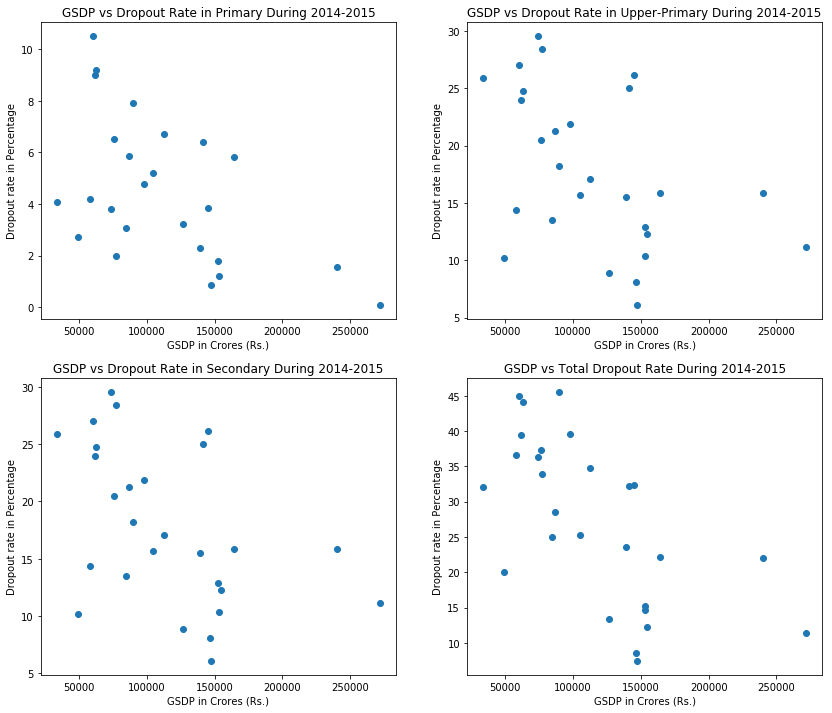

In [187]:
x = edu_do_percap_df['Per Capita GSDP (Rs.)'].values # per-capita GSDP

y1 = edu_do_percap_df['Primary - 2014-2015'].values # primary dropout

y2 = edu_do_percap_df['Upper Primary - 2014-2015'].values # upper primary dropout

y3 = edu_do_percap_df['Secondary - 2014-2015'].values # Secondary dropout

y4 = edu_do_percap_df['Total_dropout_in_2014-15'].values # Total_dropout_in_2014-15

plt.figure(figsize=(14,12))

plt.subplot(221)
plt.title('GSDP vs Dropout Rate in Primary During 2014-2015')
plt.xlabel('GSDP in Crores (Rs.)')
plt.ylabel('Dropout rate in Percentage')
plt.scatter(x,y2)

plt.subplot(222)
plt.title('GSDP vs Dropout Rate in Upper-Primary During 2014-2015')
plt.xlabel('GSDP in Crores (Rs.)')
plt.ylabel('Dropout rate in Percentage')
plt.scatter(x,y3)

plt.subplot(223)
plt.title('GSDP vs Dropout Rate in Secondary During 2014-2015')
plt.xlabel('GSDP in Crores (Rs.)')
plt.ylabel('Dropout rate in Percentage')
plt.scatter(x,y3)

plt.subplot(224)
plt.title('GSDP vs Total Dropout Rate During 2014-2015')
plt.xlabel('GSDP in Crores (Rs.)')
plt.ylabel('Dropout rate in Percentage')
plt.scatter(x,y4)
plt.show()

Primary Education<br>
1.	Maximum number of dropouts for primary education is occuring in states having Per Capita GDP between 50k to 150k. As the   Per Capita GDP increases the dropout in Primary education decreases.<br>
2.	Sikkim is the only state having Per Capita GDP around 25k and drop out is around 5%.<br>

Upper Primary Education<br>
1.	The Pattern is same as of Primary education.<br>
2.	There is a cluster of drops out in states having per capita GDP between 80k and 150k.<br>

Secondary Education<br>
1.	A large percentage, around 20%-25% of dropout is occurring in low GDP states.<br>
2.	Bihar = 24.67%, Assam = 27%, Odisha = 29.56% etc. These are the states having low GDP.<br>
3.	As compare to Primary and Upper Primary, a large percentage of dropouts occurring in Secondary Education.<br>
4.	Some states are as high as 25% - 27%.<br>

1. Irrespective of whether the GDP is high or low there is drastic jump in the number of dropouts from upper primary to secondary.<br>
2. Lower GDP states have higher secondary dropout rates compared to higher GDP states.
3. Manipur , Nagaland and Punjab have highest primary dropout rates.
4. Odhissa,Karnataka and Gujarat are some of the few states that has highest Secondary dropout rates.
